<a href="https://colab.research.google.com/github/kimleone/Competi-o-Kaggle/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Titanic

In [29]:
import pandas as pd
import numpy as np

In [30]:
url1 = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/train.csv'
url2 = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/test.csv'

titanic = pd.read_csv(url1)
teste = pd.read_csv(url2)

In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explorando os dados

###Análise rápida

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz

In [ ]:
ae = sweetviz.compare_intra(titanic, titanic['Survived'] == 0, ['Vítima','Sobrevivente'])
ae.show_html()

###**Análise exploratória dos dados**

In [32]:
#Pré-processamento básico:

#lista dos datasets que iremos modificar
datasets = [titanic,teste]

#dropando  as variáveis de interesse em cada conjunto de dados
for dataset in datasets:
  dataset.drop(['PassengerId','Ticket','Cabin'], axis = 1 , inplace = True)

In [33]:
titanic.rename(columns = {'Survived': 'Sobreviventes'}, inplace = True)
titanic.rename(columns = {'Pclass': 'Classe'}, inplace = True)
titanic.rename(columns = {'Age':'Idade'}, inplace = True)
titanic.rename(columns = {'SibSp': 'Familia'}, inplace = True)
titanic.rename(columns = {'Parch' : 'Parentes'}, inplace = True)
titanic.rename(columns = {'Fare': 'Tarifa'}, inplace = True)
titanic.rename(columns = {'Sex': 'Sexo'}, inplace = True)
titanic.rename(columns = {'Embarked': 'Embarque'}, inplace = True)
titanic.rename(columns = {'Name': 'Nome'}, inplace = True)

titanic.head()

,Sobreviventes,Classe,Nome,Sexo,Idade,Familia,Parentes,Tarifa,Embarque
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [34]:
teste.rename(columns = {'Pclass': 'Classe'}, inplace = True)
teste.rename(columns = {'Age':'Idade'}, inplace = True)
teste.rename(columns = {'SibSp': 'Familia'}, inplace = True)
teste.rename(columns = {'Parch' : 'Parentes'}, inplace = True)
teste.rename(columns = {'Fare': 'Tarifa'}, inplace = True)
teste.rename(columns = {'Sex': 'Sexo'}, inplace = True)
teste.rename(columns = {'Embarked': 'Embarque'}, inplace = True)
teste.rename(columns = {'Name': 'Nome'}, inplace = True)

teste.head()

,Classe,Nome,Sexo,Idade,Familia,Parentes,Tarifa,Embarque
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [35]:
t = pd.read_csv(url1, usecols = ['Name'])

t.iloc[0,0].split(', ')[1].split('. ')[0]

'Mr'

In [36]:
titulacao = []
for i in range(t.shape[0]):
  if t.iloc[i,0].split(', ')[1].split('. ')[0] in ['Mr','Miss','Mrs', 'Master']:
    titulacao.append(t.iloc[i,0].split(', ')[1].split('. ')[0])
  else:
    titulacao.append('Outros')

In [37]:
titanic['Titulo'] = titulacao

In [38]:
tt = []

for i in range(t.shape[0]):
  if t.iloc[i,0].split(', ')[1].split('. ')[0] in 'Mr':
    tt.append(1)
  elif t.iloc[i,0].split(', ')[1].split('. ')[0] in 'Miss':
    tt.append(2)
  elif t.iloc[i,0].split(', ')[1].split('. ')[0] in 'Mrs':
    tt.append(3)
  elif t.iloc[i,0].split(', ')[1].split('. ')[0] in 'Master':
    tt.append(4)
  else:
    tt.append(5)

In [39]:
titanic['Ntitulo'] = tt

In [40]:
t = pd.read_csv(url2, usecols = ['Name'])
t_t = []

for i in range(t.shape[0]):
  if t.iloc[i,0].split(', ')[1].split('. ')[0] in 'Mr':
    t_t.append(1)
  elif t.iloc[i,0].split(', ')[1].split('. ')[0] in 'Miss':
    t_t.append(2)
  elif t.iloc[i,0].split(', ')[1].split('. ')[0] in 'Mrs':
    t_t.append(3)
  elif t.iloc[i,0].split(', ')[1].split('. ')[0] in 'Master':
    t_t.append(4)
  else:
    t_t.append(5)

teste['Ntitulo'] = t_t

In [41]:
titanic.drop('Nome', axis = 1, inplace = True)
teste.drop('Nome', axis = 1, inplace = True)

In [42]:
titanic.corr()

,Sobreviventes,Classe,Idade,Familia,Parentes,Tarifa,Ntitulo
Sobreviventes,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.414088
Classe,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.184841
Idade,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.106788
Familia,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.258403
Parentes,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.303608
Tarifa,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.137318
Ntitulo,0.414088,-0.184841,-0.106788,0.258403,0.303608,0.137318,1.000000


In [43]:
titanic[['Ntitulo','Classe','Idade','Tarifa']].groupby([titanic['Sobreviventes'], titanic['Sexo']]).describe()

Ntitulo                      ...    Tarifa                   
                       count      mean       std  ...       50%      75%       max
Sobreviventes Sexo                                ...                             
0             female    81.0  2.320988  0.469765  ...  15.24580  27.9000  151.5500
              male     468.0  1.237179  0.886097  ...   9.41665  26.0000  263.0000
1             female   233.0  2.515021  0.657180  ...  26.00000  76.2917  512.3292
              male     109.0  1.816514  1.408737  ...  26.28750  39.0000  512.3292

[4 rows x 32 columns]

In [44]:
titanic.isnull().mean()

Sobreviventes    0.000000
Classe           0.000000
Sexo             0.000000
Idade            0.198653
Familia          0.000000
Parentes         0.000000
Tarifa           0.000000
Embarque         0.002245
Titulo           0.000000
Ntitulo          0.000000
dtype: float64

In [45]:
teste.isnull().mean()

Classe      0.000000
Sexo        0.000000
Idade       0.205742
Familia     0.000000
Parentes    0.000000
Tarifa      0.002392
Embarque    0.000000
Ntitulo     0.000000
dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


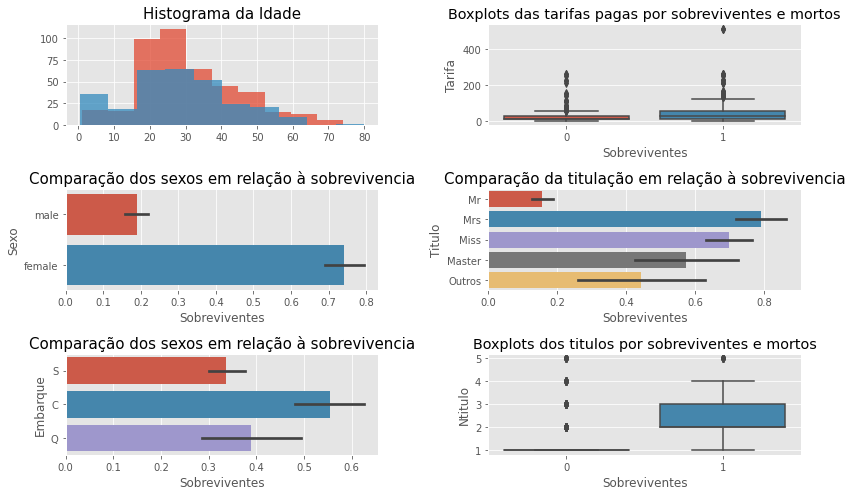

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.figure(figsize=(12,7))

plt.subplot(3,2,1)
plt.hist(titanic[ titanic['Sobreviventes'] == 0 ]['Idade'], alpha = .75)
plt.hist(titanic[titanic['Sobreviventes'] == 1]['Idade'], alpha = .75)
plt.title('Histograma da Idade', size = 15)


plt.subplot(3,2,2)
sns.boxplot(x = 'Sobreviventes', y = 'Tarifa', data = titanic)
plt.title('Boxplots das tarifas pagas por sobreviventes e mortos')

plt.subplot(3,2,3)
sns.barplot(x = 'Sobreviventes', y = 'Sexo', data = titanic)
plt.title('Comparação dos sexos em relação à sobrevivencia', size = 15)

plt.subplot(3,2,4)
sns.barplot(x = 'Sobreviventes', y = 'Titulo', data = titanic)
plt.title('Comparação da titulação em relação à sobrevivencia', size = 15)

plt.subplot(3,2,5)
sns.barplot(x = 'Sobreviventes', y = 'Embarque', data = titanic)
plt.title('Comparação dos sexos em relação à sobrevivencia', size = 15)

plt.subplot(3,2,6)
sns.boxplot(x = 'Sobreviventes', y = 'Ntitulo', data = titanic)
plt.title('Boxplots dos titulos por sobreviventes e mortos')


plt.tight_layout()

plt.show()

In [50]:
titanic.drop('Titulo', axis = 1, inplace = True)

### Algumas observações:
*   As variáveis idade e embarque possuem alguns valores faltantes no conjunto de treino. No conjunto de teste também há valores faltantes na variável tarifa; 
*   As variáveis titulação, classe e tarifa possuem as maiores correlações com a variável Sobreviventes;
*   Metade dos passageiros tinham mais de 28 anos (com um desvio padrão de 14,5 anos)
*   Metade dos passageiros pagaram mais de 14,45 (com um desvio padrão de 49,70)
*   De 890 passageiros no conjunto de treino temos apenas 360 sobreviventes 
*   A distribuição dos mortos está mais concentrada nos passageiros cuja tarifa está abaixo de 100. Ao compararmos vemos q os sobreviventes tendem a pagar mais.
*   Apenas 20,53% dos homens sobreviveram. Por outro lado, 75,29% das mulheres sobreviveram
*   60,77% dos que embarcaram na estação C sobreviveram. Apenas 28,57% dos que embarcaram na Q sobreviveram e a S tem 36% de sobreviventes.
*   Podemos notar que a maioria dos mortos tem a titulação Mr.


##Pre-processamento dos dados

###Lidando com os dados faltantes

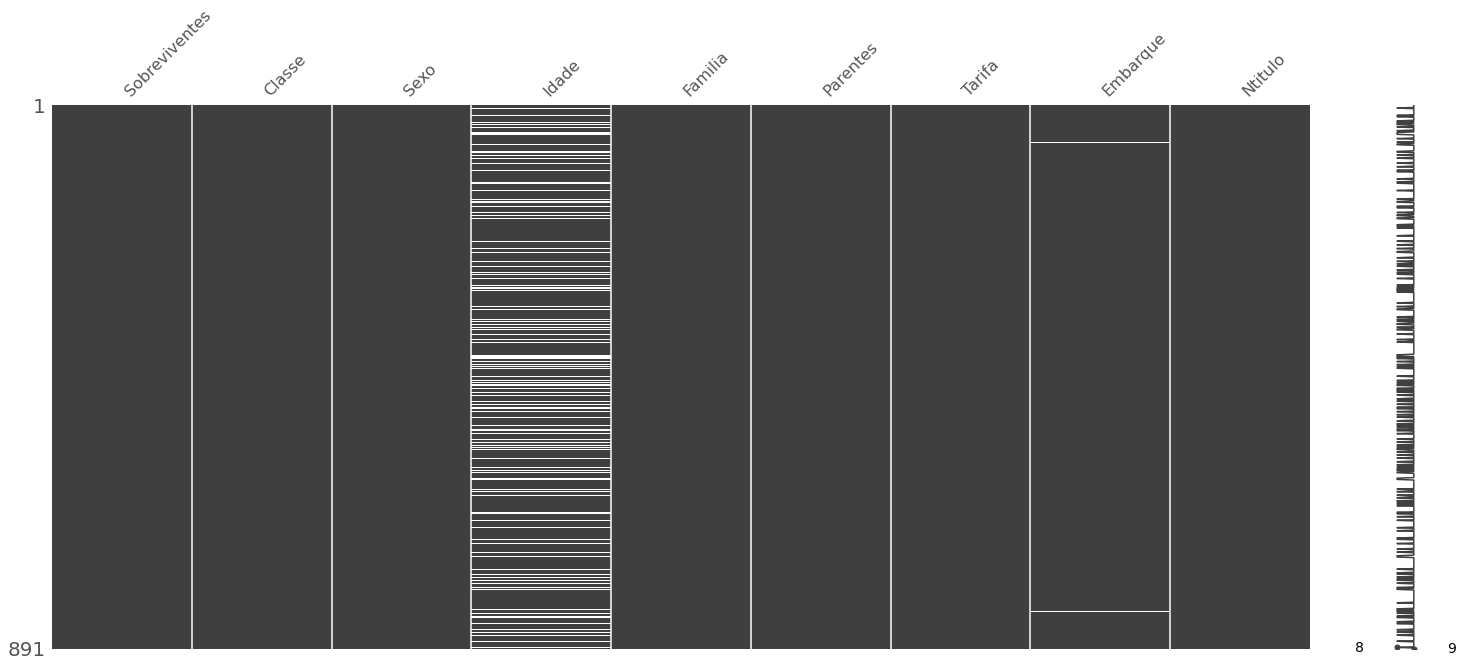

In [51]:
import missingno as msno
msno.matrix(titanic);#visualização dos dados faltantes

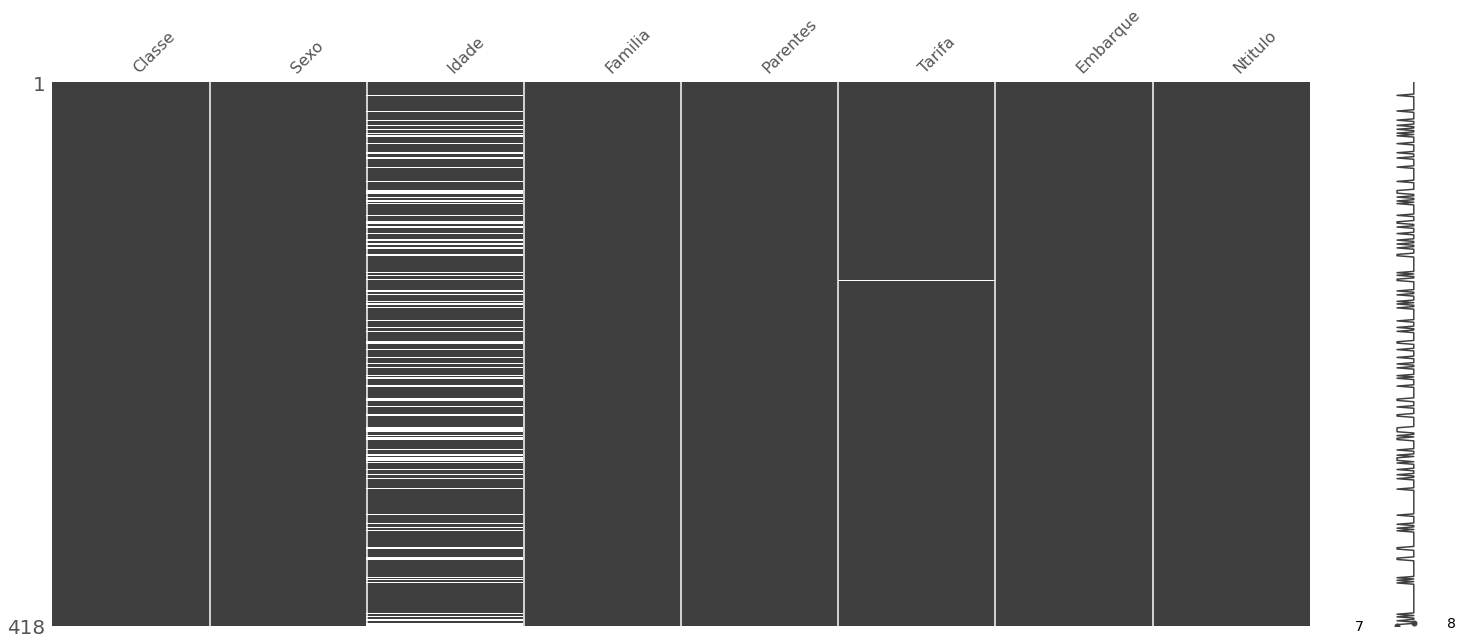

In [52]:
msno.matrix(teste)

In [53]:
moda_emb = titanic['Embarque'].mode()[0]

for dataset in datasets:
  dataset['Embarque'] = dataset['Embarque'].fillna(moda_emb)



####Usando o knn para preencher valores missing das variáveis contínuas

In [54]:
#Treino
df_numeric = titanic.select_dtypes(include = [np.float])
from fancyimpute import KNN

imputer = KNN(9)

df_filled = pd.DataFrame(imputer.fit_transform(df_numeric))
df_filled.columns = df_numeric.columns
df_filled.index = df_numeric.index

#Teste
df_numeric2 = teste.select_dtypes(include = [np.float])

df_filled2 = pd.DataFrame(imputer.fit_transform(df_numeric2))
df_filled2.columns = df_numeric2.columns
df_filled2.index = df_numeric2.index


Imputing row 1/891 with 0 missing, elapsed time: 0.126
Imputing row 101/891 with 0 missing, elapsed time: 0.127
Imputing row 201/891 with 0 missing, elapsed time: 0.128
Imputing row 301/891 with 1 missing, elapsed time: 0.130
Imputing row 401/891 with 0 missing, elapsed time: 0.131
Imputing row 501/891 with 0 missing, elapsed time: 0.132
Imputing row 601/891 with 0 missing, elapsed time: 0.133
Imputing row 701/891 with 0 missing, elapsed time: 0.135
Imputing row 801/891 with 0 missing, elapsed time: 0.136
Imputing row 1/418 with 0 missing, elapsed time: 0.030
Imputing row 101/418 with 0 missing, elapsed time: 0.031
Imputing row 201/418 with 1 missing, elapsed time: 0.033
Imputing row 301/418 with 0 missing, elapsed time: 0.035
Imputing row 401/418 with 0 missing, elapsed time: 0.036


In [55]:
titanic['Idade'] = df_filled['Idade']
titanic['Tarifa'] = df_filled['Tarifa']
teste['Idade'] = df_filled2['Idade']
teste['Tarifa'] = df_filled2['Tarifa']

### Trocando a variavel sexo por valores binários

In [56]:
titanic['Sexo'] = titanic['Sexo'].map({'male':0, 'female': 1})
teste['Sexo'] = teste['Sexo'].map({'male': 0,'female': 1})


###Dummyficação da variável Embarque

In [57]:
titanic = pd.get_dummies(titanic, columns = ['Ntitulo','Embarque'], drop_first = True)
teste = pd.get_dummies(teste, columns = ['Ntitulo','Embarque'], drop_first = True)

In [58]:
titanic.head()

,Sobreviventes,Classe,Sexo,Idade,Familia,Parentes,Tarifa,Ntitulo_2,Ntitulo_3,Ntitulo_4,Ntitulo_5,Embarque_Q,Embarque_S
0,0,3,0,22.0,1,0,7.2500,0,0,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,1,0,0,0,0
2,1,3,1,26.0,0,0,7.9250,1,0,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,1,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,0,0,1


###Padronizando variáveis contínuas

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

In [60]:
aux0 = sc.fit_transform(titanic[['Idade','Tarifa']])
aux1 = pd.DataFrame(aux0, columns = ['NIdade', 'NTarifa'])
titanic = pd.concat([titanic, aux1], axis = 1)
titanic.drop(['Idade', 'Tarifa'], axis = 1, inplace = True)

In [61]:
aux0 = sc.fit_transform(teste[['Idade', 'Tarifa']])
aux1 = pd.DataFrame(aux0, columns = ['NIdade', 'NTarifa'])
teste = pd.concat([teste, aux1], axis = 1)
teste.drop(['Idade', 'Tarifa'], axis = 1, inplace = True)

In [62]:
titanic.head()

,Sobreviventes,Classe,Sexo,Familia,Parentes,Ntitulo_2,Ntitulo_3,Ntitulo_4,Ntitulo_5,Embarque_Q,Embarque_S,NIdade,NTarifa
0,0,3,0,1,0,0,0,0,0,0,1,-0.587368,-0.502445
1,1,1,1,1,0,0,1,0,0,0,0,0.597733,0.786845
2,1,3,1,0,0,1,0,0,0,0,1,-0.291093,-0.488854
3,1,1,1,1,0,0,1,0,0,0,1,0.375526,0.420730
4,0,3,0,0,0,0,0,0,0,0,1,0.375526,-0.486337


##Modelo

In [63]:
# Modelo
from sklearn.ensemble import RandomForestClassifier
#Validação
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [64]:
#Separando variável explicativa e variável resposta do treinamento

X = titanic.drop('Sobreviventes', axis = 1)
Y = titanic['Sobreviventes']

In [69]:
#Validação cruzada
kf = KFold(n_splits = 21, shuffle = True)

###Random Forest

In [70]:
#Encontrando o melhor valor do 'max_depth' através de validação cruzada K-FOLD

from sklearn.model_selection import GridSearchCV

valores = np.arange(2,21,2)
parametros = {'max_depth': valores}

clf = GridSearchCV(RandomForestClassifier(), param_grid = parametros, cv = kf, scoring = 'accuracy')
clf.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=21, random_state=None, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_s

In [71]:
#melhor 'max_depth'
clf.best_params_

{'max_depth': 8}

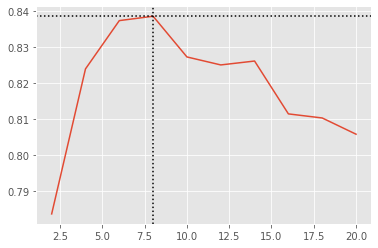

In [72]:
# gráfico de todos as acurácias obtidas no GridSearch

import matplotlib.pyplot as plt

accs = clf.cv_results_['mean_test_score']
melhor = clf.best_params_.get('max_depth')

plt.plot(valores, accs)
plt.axhline(max(accs), color = 'black', linestyle = 'dotted')
plt.axvline(melhor, color = 'black', linestyle = 'dotted')
plt.show()

In [73]:
#verificando a performance

modelo = RandomForestClassifier(max_depth = 8)
accs_vc = cross_val_score(modelo, X, Y, cv = 10, scoring = 'accuracy')
 
print('Acurácia do Random Forest: {:.2f}%'.format(100*accs_vc.mean()))

Acurácia do Random Forest: 83.06%


###Curva ROC

In [79]:
from sklearn.metrics import roc_curve

# compute true positive rate and false positive rate
modelo.fit(X,Y)
y = modelo.predict_proba(X)
y = y[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y, y)

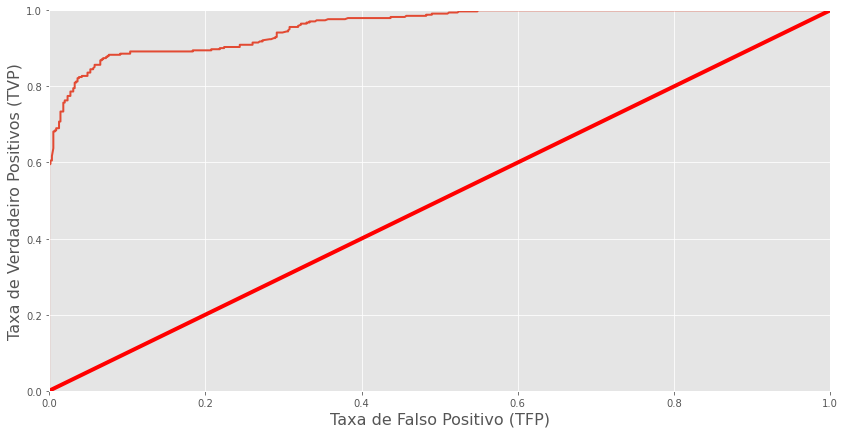

In [83]:
def plot_roc_curve(false_positive_rate,true_positive_rate, label = None):
  plt.plot(false_positive_rate,true_positive_rate, linewidth=2, label = label)
  plt.plot([0,1],[0,1],'r',linewidth = 4)
  plt.axis([0,1,0,1])
  plt.xlabel('Taxa de Falso Positivo (TFP)', fontsize = 16)
  plt.ylabel('Taxa de Verdadeiro Positivos (TVP)', fontsize = 16)

plt.figure(figsize = (14,7))
plot_roc_curve(false_positive_rate,true_positive_rate)
plt.show()

In [84]:
from sklearn.metrics import roc_auc_score

r_a_score = roc_auc_score(Y,y)
print('ROC-AUT-Score:', r_a_score)

ROC-AUT-Score: 0.9567768084449131


##Preparando o csv pa submeter o modelo ao Kaggle

In [85]:
pred = modelo.predict(teste)

url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/test.csv' 
subm = pd.read_csv(url, usecols = ['PassengerId'] )  
subm['Survived'] = pred

subm.to_csv('Nova_submissao.csv', index = False)